Initialize data and provide a preview
----------

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
import pprint

details = pd.read_csv('details_c.csv')
locations = pd.read_csv('locations_c.csv')
fatalities = pd.read_csv('fatalities_c.csv')

print('Details', '\n', details.head(), "\n", len(details), "\n", '-------------------', "\n", '-------------------')
print('Locations', '\n', locations.head(), "\n", len(locations), "\n",  '-------------------', "\n", '-------------------')
print('Fatalities', '\n', fatalities.head(), "\n", len(fatalities), "\n", '-------------------', "\n", '-------------------')

print('-------------------', "\n", '-------------------', "\n", '-------------------', "\n")
print(details.loc[20], '\n', '-------------------', "\n", '-------------------', "\n")
print(locations.loc[20], '\n', '-------------------', "\n", '-------------------', "\n")
print(fatalities.loc[20])

Details 
   last_date_modified  last_date_certified  episode_id  event_id  \
0                NaN  08/04/2021 11:50:34      159374    963885   
1                NaN  08/04/2021 11:50:34      159382    963893   
2                NaN  08/04/2021 11:50:34      159382    963895   
3                NaN  08/04/2021 11:50:34      159382    963897   
4                NaN  08/04/2021 11:50:34      159382    963898   

            state  state_fips  year month_name                event_type  \
0  GULF OF MEXICO          85  2021       July                Waterspout   
1  GULF OF MEXICO          85  2021       July  Marine Thunderstorm Wind   
2  GULF OF MEXICO          85  2021       July  Marine Thunderstorm Wind   
3  GULF OF MEXICO          85  2021       July  Marine Thunderstorm Wind   
4  GULF OF MEXICO          85  2021       July  Marine Thunderstorm Wind   

  cz_type  ...  tor_f_scale tor_length tor_width tor_other_wfo  \
0       Z  ...          NaN        NaN       NaN           NaN  

In [44]:
unique_states = (details.state.unique())
for i in range(len(unique_states)): print(unique_states[i])

print(details.month_name.unique())

GULF OF MEXICO
FLORIDA
CALIFORNIA
NEVADA
NEW YORK
VERMONT
MISSISSIPPI
LOUISIANA
GEORGIA
ATLANTIC SOUTH
ILLINOIS
KANSAS
MISSOURI
TEXAS
MICHIGAN
LAKE MICHIGAN
LAKE SUPERIOR
NEBRASKA
IOWA
SOUTH CAROLINA
OKLAHOMA
ARKANSAS
NEW MEXICO
INDIANA
KENTUCKY
OHIO
IDAHO
CONNECTICUT
MASSACHUSETTS
RHODE ISLAND
MINNESOTA
COLORADO
UTAH
MONTANA
OREGON
WISCONSIN
ALABAMA
NORTH CAROLINA
PENNSYLVANIA
HAWAII
TENNESSEE
LAKE ST CLAIR
LAKE HURON
LAKE ONTARIO
ST LAWRENCE R
LAKE ERIE
NORTH DAKOTA
NEW JERSEY
MARYLAND
DELAWARE
ARIZONA
PUERTO RICO
VIRGINIA
DISTRICT OF COLUMBIA
ATLANTIC NORTH
WEST VIRGINIA
WASHINGTON
SOUTH DAKOTA
WYOMING
MAINE
NEW HAMPSHIRE
['July']


In [2]:
print('Number of unique fatality events: ', fatalities.event_id.nunique())
print('Number of unique storms: ', details.episode_id.nunique())
print('Number of unique locations: ', locations.location.nunique())
#print(details.head(0))

Number of unique fatality events:  28
Number of unique storms:  1350
Number of unique locations:  5008


Analysis by of storm type vs. damage costs
----------

In [3]:
costs_breakdown = pd.DataFrame(columns = ['storm_type', 'damage_property', 'damage_crops', 'event_id'])

for i in range(len(details)):
    prop, crops = 0, 0
    temp_val = []
    val_p = details.damage_property.loc[i]
    val_c = details.damage_crops.loc[i]
    if pd.isna(val_p) is True: prop = 0
    elif val_p[-1] == 'K':
        temp_val = float(val_p.replace('K', ''))
        prop = temp_val * 1000
    elif val_p[-1] == 'M':
        temp_val = float(val_p.replace('M', ''))
        prop = temp_val * 1000000
    else: prop = val_p
    
    if pd.isna(val_c) is True: crops = 0
    elif val_c[-1] == 'K':
        temp_val = float(val_c.replace('K', ''))
        crops = temp_val * 1000
    elif val_c[-1] == 'M':
        temp_val = float(val_c.replace('M', ''))
        crops = temp_val * 1000000
    else: crops = val_c
    
    costs_breakdown = costs_breakdown.append({'storm_type': details.event_type.loc[i], 'damage_property': prop, 'damage_crops': crops, 'event_id': details.event_id[i]}, ignore_index = True)

#print(costs_breakdown[costs_breakdown['storm_type'] == 'Waterspout'])

In [4]:
storm_types = (costs_breakdown.storm_type.unique())
damage_avg = pd.DataFrame(columns = ['storm_type', 'property_damage_avg', 'crop_damage_avg', 'num_storm_total', 'num_storm_no_damage', 'num_storm_with_damage', 'prct_damage'])
damaging_storms_avg = pd.DataFrame(columns = ['storm_type', 'property_damage_avg', 'crop_damage_avg'])

for storm in storm_types:
    x = 0
    n = len(costs_breakdown[costs_breakdown['storm_type'] == storm])
    storm_data = costs_breakdown[costs_breakdown['storm_type'] == storm].reset_index(drop = True)
    prop_avg = round(sum(costs_breakdown.damage_property[costs_breakdown['storm_type'] == storm])/n, 2)
    crop_avg = round(sum(costs_breakdown.damage_crops[costs_breakdown['storm_type'] == storm])/n, 2)
    
    for i in range(len(costs_breakdown[costs_breakdown['storm_type'] == storm])): 
        #if storm == 'Waterspout': print(storm_data)
        if storm_data.damage_property.loc[i] > 0 or storm_data.damage_crops.loc[i] > 0: x += 1
    
    damage_avg = damage_avg.append({'storm_type': storm, 'property_damage_avg': prop_avg, 'crop_damage_avg': crop_avg, 'num_storm_total': n, 'num_storm_no_damage': n-x, 'num_storm_with_damage': x, 'prct_damage': round((x/n)*100, 2)}, ignore_index = True)

#####
damaging_storms_numbers = pd.DataFrame(columns = ['storm_type', 'num_storm_total', 'num_storm_with_damage'])
for i in range(len(damage_avg)):
    if damage_avg.property_damage_avg.loc[i] == 0 and damage_avg.crop_damage_avg.loc[i] == 0: pass
    else: damaging_storms_avg = damaging_storms_avg.append({'storm_type': damage_avg.storm_type.loc[i], 'property_damage_avg': damage_avg.property_damage_avg.loc[i], 'crop_damage_avg': damage_avg.crop_damage_avg.loc[i]}, ignore_index = True)
    
    damaging_storms_numbers = damaging_storms_numbers.append({'storm_type': damage_avg.storm_type.loc[i], 'num_storm_total': damage_avg.num_storm_total.loc[i], 'num_storm_with_damage': damage_avg.num_storm_with_damage.loc[i]}, ignore_index = True)

#print(damaging_storms_avg)#.sort_values(by=['property_damage_avg', 'crop_damage_avg'], ascending = False))
#print(damage_avg.sort_values(by=['prct_damage'], ascending = False))
print(damaging_storms_numbers)

                    storm_type num_storm_total num_storm_with_damage
0                   Waterspout              35                     0
1     Marine Thunderstorm Wind             428                     1
2            Thunderstorm Wind            3358                  1636
3                        Flood             216                    43
4                   Dust Storm              25                     1
5                  Flash Flood            1089                   422
6                   Heavy Rain             335                     6
7               Tropical Storm              95                    44
8                      Tornado             120                    52
9        Marine Tropical Storm              54                     0
10                        Hail             757                    20
11                   Lightning              57                    42
12                 Rip Current              12                     0
13              Excessive Heat    

Analysis by of storm type vs. fatalities
----------

In [5]:
fatality_details = details.merge(fatalities, on='event_id', how = 'inner')
fatality_storm_types = fatality_details.event_type.unique()
killer_storm_breakdown = pd.DataFrame(columns = ['storm_type', 'number_fatalities', 'unique_events'])

for storm in fatality_storm_types:
    n = len(fatality_details[fatality_details['event_type'] == storm])
    killer_storm_breakdown = killer_storm_breakdown.append({'storm_type': storm, 'number_fatalities': n, 'unique_events': fatality_details.event_id[fatality_details['event_type'] == storm].nunique()}, ignore_index = True)
#    print('Number of unique', storm, 'events: ', fatality_details.event_id[fatality_details['event_type'] == storm].nunique())
    
print(killer_storm_breakdown.sort_values(by = 'number_fatalities', ascending = False))



              storm_type number_fatalities unique_events
3            Flash Flood                10             5
0  Marine Tropical Storm                 9             1
9             Dust Storm                 8             1
1                   Heat                 7             5
4             Heavy Rain                 5             2
5              Lightning                 5             5
2            Rip Current                 3             3
7      Thunderstorm Wind                 3             3
6               Wildfire                 2             2
8                  Flood                 1             1


In [6]:
#print(fatality_details)
fatal_id = 0
num_fatalities = 0
event_name = ''
for i in range(len(fatality_details)):
    if num_fatalities < len(fatality_details[fatality_details['episode_id'] == fatality_details.episode_id.loc[i]]):
        fatal_id = fatality_details.episode_id.loc[i]
        num_fatalities = len(fatality_details[fatality_details['episode_id'] == fatality_details.episode_id.loc[i]])
        event_name = fatality_details.episode_title.loc[i]
    
print('Most fatal single event:', event_name)

Most fatal single event: Tropical Storm Elsa over the Florida Keys Coastal Waters


In [7]:
storm_types = details.event_type.unique()
#print(storm_types)
no_fatalities = []

for storm in storm_types:
    x = 0
    for i in range(len(fatality_storm_types)):
        if fatality_storm_types[i] == storm: x = 1
    if x == 0: no_fatalities.append(storm)
        

#print('Storms with no fatalities:')
#for item in no_fatalities: print(item)

damages_and_death = pd.DataFrame(columns = ['Storm_type', "Numer_of_events", 'Property_damages', 'Crop_damages', 'Deaths'])

for item in storm_types:
    storm_count, prop_count, crop_count, death_count = 0, 0, 0, 0
    unique_items = []
    

Area with the most storms
----------

In [8]:
states = details.state.unique()
location_breakdown = pd.DataFrame(columns = ['state', 'num_of_events'])
for location in states:
    #print(details[details['state'] == location].nunique())
    location_breakdown = location_breakdown.append({'state': location, 'num_of_events': details.episode_id[details['state'] == location].nunique()}, ignore_index = True)

print(location_breakdown.sort_values(by = 'num_of_events', ascending = False))


            state num_of_events
13          TEXAS            67
38   PENNSYLVANIA            58
31       COLORADO            54
4        NEW YORK            50
50        ARIZONA            48
..            ...           ...
41  LAKE ST CLAIR             4
16  LAKE SUPERIOR             3
44  ST LAWRENCE R             2
43   LAKE ONTARIO             2
29   RHODE ISLAND             2

[61 rows x 2 columns]


Most common storm type
---

In [48]:
common_events = pd.DataFrame(columns = ['event_type', 'number_of_events'])

for item in storm_types: common_events = common_events.append({'event_type': item, 'number_of_events': details.episode_id[details['event_type'] == item].nunique()}, ignore_index = True)
    
print(common_events.sort_values(by = 'number_of_events', ascending = False))

                    event_type number_of_events
2            Thunderstorm Wind              626
5                  Flash Flood              326
10                        Hail              250
1     Marine Thunderstorm Wind              117
3                        Flood              104
6                   Heavy Rain               57
8                      Tornado               52
11                   Lightning               52
16                        Heat               48
18                     Drought               43
14                    Wildfire               41
13              Excessive Heat               27
19                 Debris Flow               27
20                Funnel Cloud               26
0                   Waterspout               26
7               Tropical Storm               17
9        Marine Tropical Storm               13
12                 Rip Current               11
4                   Dust Storm               11
15                 Strong Wind          

Graphs
---

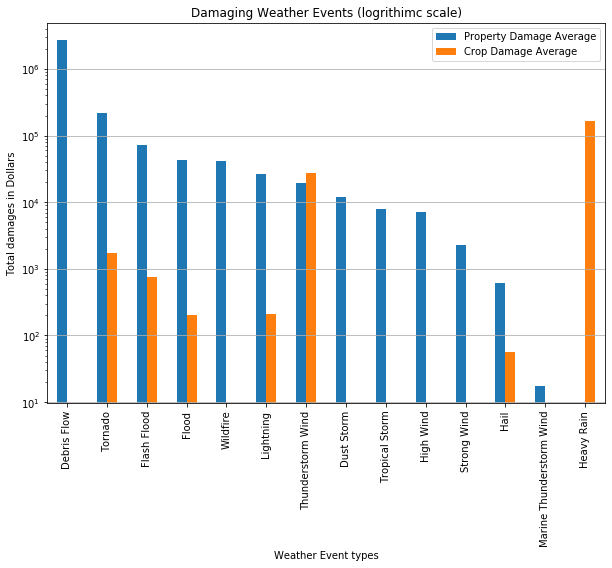

<Figure size 432x288 with 0 Axes>

In [47]:
#Damaging events
damaging_storms_avg = damaging_storms_avg.sort_values(by = ['property_damage_avg', 'crop_damage_avg'], ascending = False)
dam_storm_types = damaging_storms_avg['storm_type'].array
legend_damages_costs = ['Property Damage Average', 'Crop Damage Average']

damaging_storms_avg.plot(kind = 'bar', figsize = (10, 7))
plt.title('Damaging Weather Events (logrithimc scale)')
plt.yscale('log')
plt.ylabel('Total damages in Dollars')
plt.xlabel('Weather Event types')
plt.grid(axis = 'y')
plt.legend(legend_damages_costs)
plt.xticks(ticks = range(len(dam_storm_types)), labels = dam_storm_types)
plt.savefig('Damages Costs.png', bbox_inches = 'tight')
plt.show()
plt.clf()

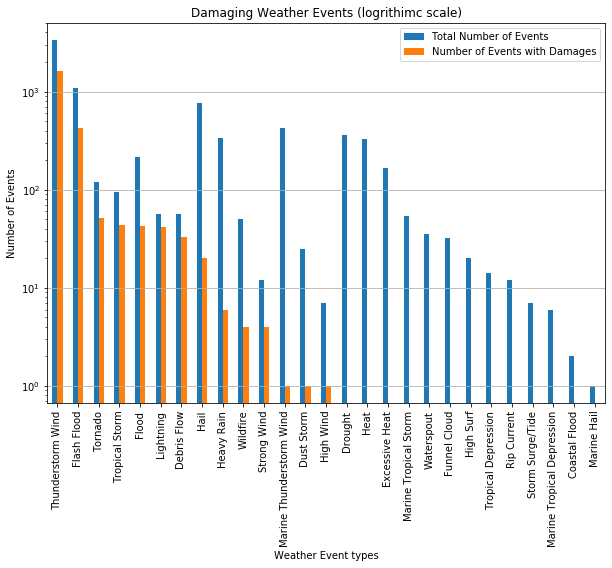

<Figure size 432x288 with 0 Axes>

In [27]:
#Damaging events numbers
damaging_storms_numbers = damaging_storms_numbers.sort_values(by=['num_storm_with_damage', 'num_storm_total'], ascending = False)#.reset_index()
dam_storm_num = damaging_storms_numbers.storm_type.array
legend_damage_totals = ['Total Number of Events', 'Number of Events with Damages']

#plt.figure(figsize = (15, 10))
damaging_storms_numbers.plot(kind = 'bar', figsize = (10, 7))
plt.title('Damaging Weather Events (logrithimc scale)')
plt.yscale('log')
plt.ylabel('Number of Events')
plt.xlabel('Weather Event types')
plt.legend(legend_damage_totals)
plt.grid(axis = 'y')
plt.xticks(ticks = range(len(dam_storm_num)), labels = dam_storm_num)
plt.savefig('Damage Totals.png', bbox_inches = 'tight')
plt.show()
plt.clf()

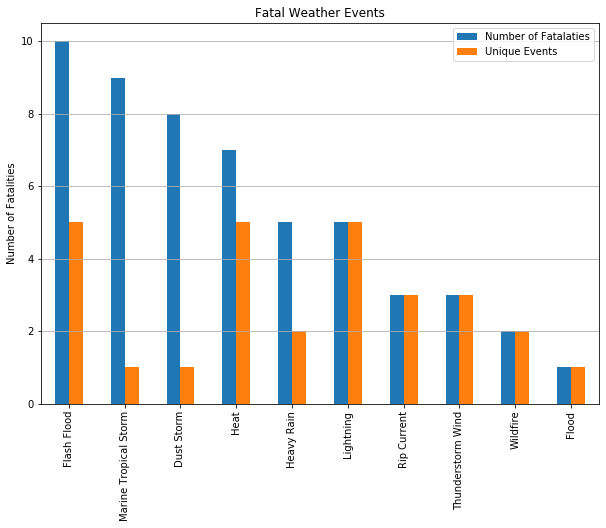

In [50]:
#Fatal events
killer_storm_breakdown = killer_storm_breakdown.sort_values(by = 'number_fatalities', ascending = False)
fatal_storms = killer_storm_breakdown['storm_type'].array
legend_fatal_counts = ['Number of Fatalaties', 'Unique Events']

killer_storm_breakdown.plot(kind = 'bar', figsize = (10, 7))#, color = 'green', 'magenta')
plt.grid(axis = 'y')
plt.title('Fatal Weather Events')
plt.ylabel('Number of Fatalities')
plt.legend(legend_fatal_counts)
plt.xticks(ticks = range(len(fatal_storms)), labels = fatal_storms)
plt.savefig('Fatal Counts.png', bbox_inches = 'tight')
plt.show()